ver: 20210917.1049

In [26]:
# Initialization for this notebook.

import numpy as np
import matplotlib.pyplot as plt

# Un-comment the following line to use interactive matplotlib widget.
#%matplotlib widget

# 1.1 离散时间信号———序列

## 1.1.1 序列

$$ x(n)=x_a(t)|_{t=nT}=x_a(nT) $$

序列在计算机程序中，通常使用数组来实现。例如，在Python中实现 $ x(n)=\{-5, -3, \underline{-1}, 0, 2, 7, 9\} $ 可以是：

In [27]:
x = np.array([-5, -3, -1, 0, 2, 7, 9])
print("x =", x)

x = [-5 -3 -1  0  2  7  9]


In [28]:
# Pay close attention to the values!
print(x[-1], x[0], x[1])

9 -5 -3


理论的序列，下标取值范围是**整个整数集合**。但在大多数计算机语言中，数组的下标是**从一个固定的数值开始**。如Python/C/C++/Java等是从0开始，MATLAB是从1开始。因此，要特别小心下标的正确转换。

一种常见解决方法是，为序列记录下它 $n=0$ 时对应的数组下标，称为（$n$ 的）偏移量(offset)。这样，理论上序列的值$x(n)$就和数组值`x[n+noff]`相对应了。

In [29]:
# Define a sequence and it's offset.
x = np.array([-5, -3, -1, 0, 2, 7, 9])
noff_x = 2  # Offset of n for sequence x. Meaning x[noff_x] is x(n=0).

print("x =", x, ", noff_x =", noff_x)
print("[x_n(-1), x_n(0), x_n(1)] = [", x[-1+noff_x], x[0+noff_x], x[1+noff_x], "]")

x = [-5 -3 -1  0  2  7  9] , noff_x = 2
[x_n(-1), x_n(0), x_n(1)] = [ -3 -1 0 ]


In [30]:
# To get the "theoretical" x(n).
# Note: As a function, it can only "get", not "set" the value!
x_n = lambda n: x[n +noff_x]

print("x =", x, ", noff_x =", noff_x)
print("[x_n(-1), x_n(0), x_n(1)] = [", x_n(-1), x_n(0), x_n(1), "]")

x = [-5 -3 -1  0  2  7  9] , noff_x = 2
[x_n(-1), x_n(0), x_n(1)] = [ -3 -1 0 ]


In [31]:
# Returns a n seqence based on the offset provided.
seq_n = lambda seq, noff: np.arange(seq.size) - noff

print("x   =", x)
print("n_x =", seq_n(x, noff_x))

x   = [-5 -3 -1  0  2  7  9]
n_x = [-2 -1  0  1  2  3  4]


Text(0, 0.5, 'x(n)')

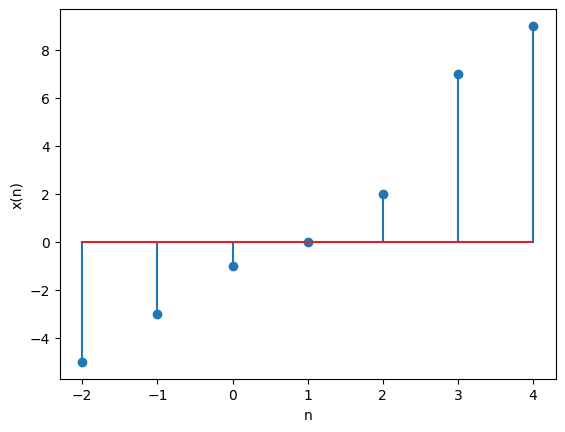

In [32]:
# seq_n() is especially useful when plotting a sequence.
fig, ax = plt.subplots()
ax.stem(seq_n(x, noff_x),x)
ax.set_xlabel('n')
ax.set_ylabel('x(n)')

对于有规律的序列，如：
$$ x(n) = a^n $$
我们通常采用编程的方式来产生。需要注意，一般情况下计算机只分析处理有限长度的序列。因此，我们往往会在程序中限定 $n$ 的取值范围，并近似认为序列是有限长序列。

x = [3.200e+01 1.600e+01 8.000e+00 4.000e+00 2.000e+00 1.000e+00 5.000e-01
 2.500e-01 1.250e-01 6.250e-02 3.125e-02] , noff_x = 5


Text(0.5, 1.0, 'x(n) = a^n')

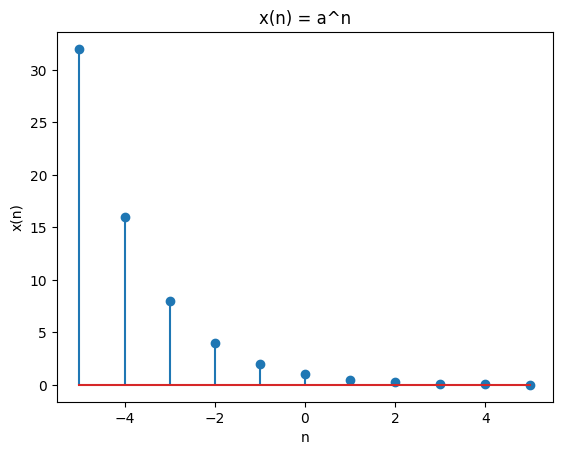

In [33]:
# Parameters
(n_min, n_max) = (-5, 5)    # The range of n
a = 0.5

# Generate the sequence
x = np.array([a**n for n in range(n_min, n_max+1)])  # Why '+1'?
noff_x = 0 - n_min          # Why?

print("x =", x, ", noff_x =", noff_x)

# Plot the sequence
fig, ax = plt.subplots()
ax.stem(seq_n(x, noff_x), x)
ax.set_xlabel('n')
ax.set_ylabel('x(n)')
ax.set_title('x(n) = a^n')

## 作业

参考以上教师提供的序列生成代码，编写程序生成以下指定序列。

要求
- 每个序列都只通过修改 `n_min`, `n_max` 参数即可改变所生成的序列的下标区间。
- 每一行代码都要有注释（可以使用中文）。
- 将本 `ipynb` 文件（带有输出结果的）导出为 `html` 文件格式，再连同 `ipynb` 文件打包压缩成7z格式提交。

1. 试生成以下序列：
$$
\delta(n) = \begin{cases}
    1, n=0  \\
    0, n \neq 0  
\end{cases}
$$

x = [0 0 0 0 0 1 0 0 0 0 0] , noff_x = 5


Text(0.5, 1.0, 'x(n) = check_zero')

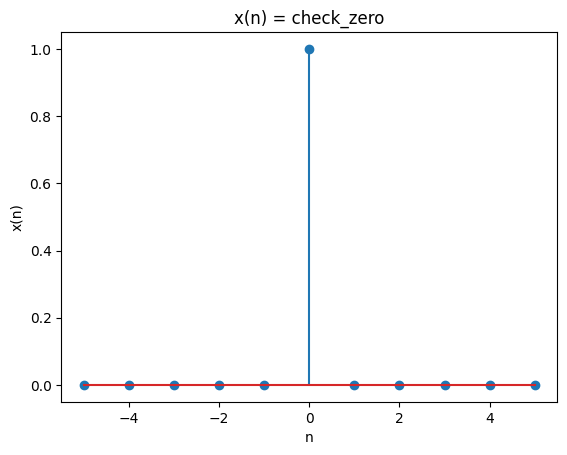

In [34]:
# [To be completed by students.]

# 设置n的最小值和最大值分别为-5和5
(n_min, n_max) = (-5, 5)
# 设置间隔a为0.5
a = 0.5

# 定义一个函数num，它接受一个参数n
def num(n):
    # 如果n等于0，返回1
    if n == 0:
        return 1
    # 如果n不等于0，返回0
    else:
        return 0

# 使用列表推导式和num函数，创建一个numpy数组x，包含n_min到n_max范围内每个n的num函数结果
x = np.array([num(n) for n in range(n_min, n_max+1)])
# 计算n偏移量noff_x，它是0减去n_min的值
noff_x = 0 - n_min

# 打印数组x和偏移量noff_x
print("x =", x, ", noff_x =", noff_x)

# 创建一个图形和坐标轴
fig, ax = plt.subplots()
# 在坐标轴上绘制一个茎叶图，显示序列x和它的n偏移量noff_x
ax.stem(seq_n(x, noff_x), x)
# 设置x轴标签为'n'
ax.set_xlabel('n')
# 设置y轴标签为'x(n)'
ax.set_ylabel('x(n)')
# 设置图形标题为'x(n) = check_zero'
ax.set_title('x(n) = check_zero')

2. 试生成以下序列：
$$
u(n) = \begin{cases}
    1, n \geqslant 0  \\
    0, n < 0  
\end{cases}
$$

x = [0 0 0 0 0 1 1 1 1 1 1] , noff_x = 5


Text(0.5, 1.0, 'x(n) = check_one')

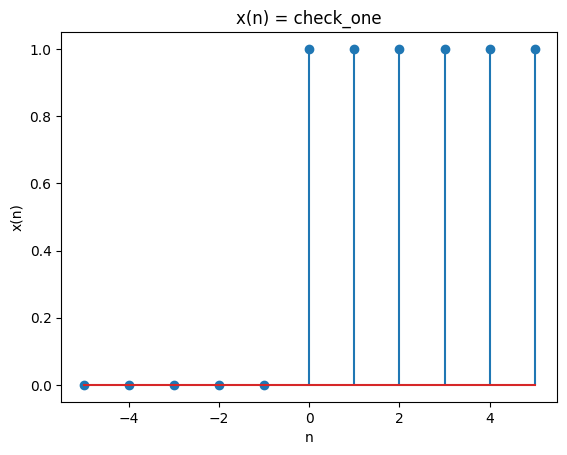

In [35]:
# [To be completed by students.]

# 设置n的最小值和最大值分别为-5和5
(n_min, n_max) = (-5, 5)
# 设置间隔a为0.5
a = 0.5

# 定义一个函数num，它接受一个参数n
def num(n):
    # 如果n大于等于0，返回1
    if n >= 0:
        return 1
    # 如果n小于0，返回0
    else:
        return 0

# 使用列表推导式和num函数，创建一个numpy数组x，包含n_min到n_max范围内每个n的num函数结果
x = np.array([num(n) for n in range(n_min, n_max+1)])
# 计算n偏移量noff_x，它是0减去n_min的值
noff_x = 0 - n_min

# 打印数组x和偏移量noff_x
print("x =", x, ", noff_x =", noff_x)

# 创建一个图形和坐标轴
#fig.绘图窗口 ax.带坐标轴的
fig, ax = plt.subplots()
# 在坐标轴上绘制一个茎叶图，显示序列x和它的n偏移量noff_x
ax.stem(seq_n(x, noff_x), x)
# 设置x轴标签为'n'
ax.set_xlabel('n')
# 设置y轴标签为'x(n)'
ax.set_ylabel('x(n)')
# 设置图形标题为'x(n) = check_one'
ax.set_title('x(n) = check_one')

3. 试生成以下序列：
$$
R_N(n) = \begin{cases}
    1, 0 \leqslant n \leqslant N-1  \\
    0, \text{其他}n
\end{cases}
$$
$N$为大于0的整数

x = [0 0 0 0 0 1 1 1 0 0 0] , noff_x = 5


Text(0.5, 1.0, 'x(n) = check')

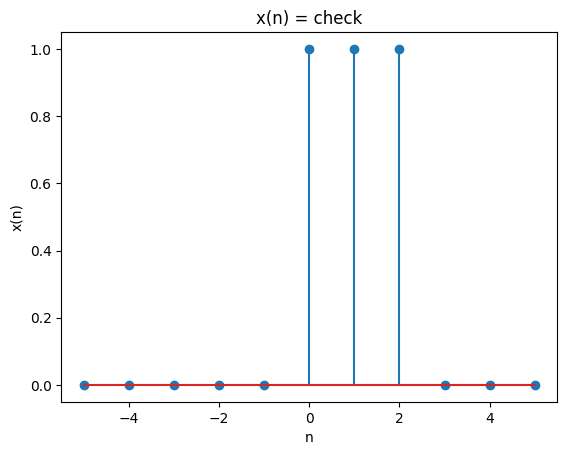

In [36]:
# [To be completed by students.]

# 设置N的值为3
N=3
# 设置n的最小值和最大值分别为-5和5
(n_min, n_max) = (-5, 5)
# 设置间隔a为0.5
a = 0.5

# 定义一个函数num，它接受一个参数n
def num(n):
    # 如果n大于等于0且小于等于N-1，返回1
    if n >= 0 and n<=(N-1):
        return 1
    # 如果n不满足上面条件，返回0
    else:
        return 0

# 使用列表推导式和num函数，创建一个numpy数组x，包含n_min到n_max范围内每个n的num函数结果
x = np.array([num(n) for n in range(n_min, n_max+1)])
# 计算n偏移量noff_x，它是0减去n_min的值
noff_x = 0 - n_min

# 打印数组x和偏移量noff_x
print("x =", x, ", noff_x =", noff_x)

# 创建一个图形和坐标轴
fig, ax = plt.subplots()
# 在坐标轴上绘制一个茎叶图，显示序列x和它的n偏移量noff_x
ax.stem(seq_n(x, noff_x), x)
# 设置x轴标签为'n'
ax.set_xlabel('n')
# 设置y轴标签为'x(n)'
ax.set_ylabel('x(n)')
# 设置图形标题为'x(n) = check'
ax.set_title('x(n) = check')